In [183]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
#In this project we are using different parameters of wine from chemical analysis and trying to predict if the wine is high or low quality.
#The data data source is the following:
#Data Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
df=pd.read_csv("wine_fraud.csv")

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [186]:
#there are no missing values and we have 6497 entries, we have to string type columns, feature type and label quality
df["type"].unique()

array(['red', 'white'], dtype=object)

In [187]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [188]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<Axes: xlabel='quality', ylabel='count'>

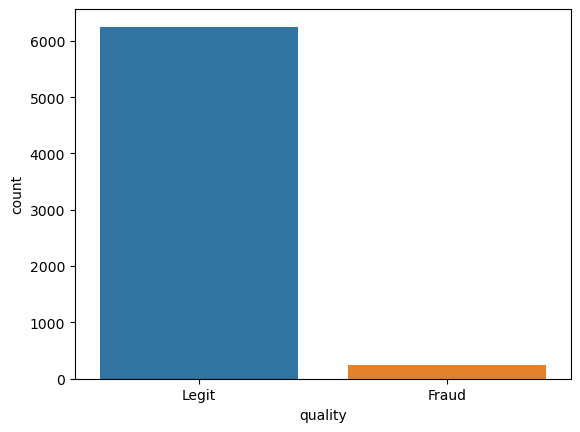

In [189]:
sns.countplot(data=df,x="quality")

In [190]:
df.groupby("quality")["type"].count()

quality
Fraud     246
Legit    6251
Name: type, dtype: int64

In [191]:
#We have majoriy of labels as Legit

In [192]:
df_feature=df.drop("type",axis=1)
df_feature["quality"]=df_feature["quality"].map({"Legit":1,"Fraud":0})

C:\Users\17573\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\17573\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\17573\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\17573\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

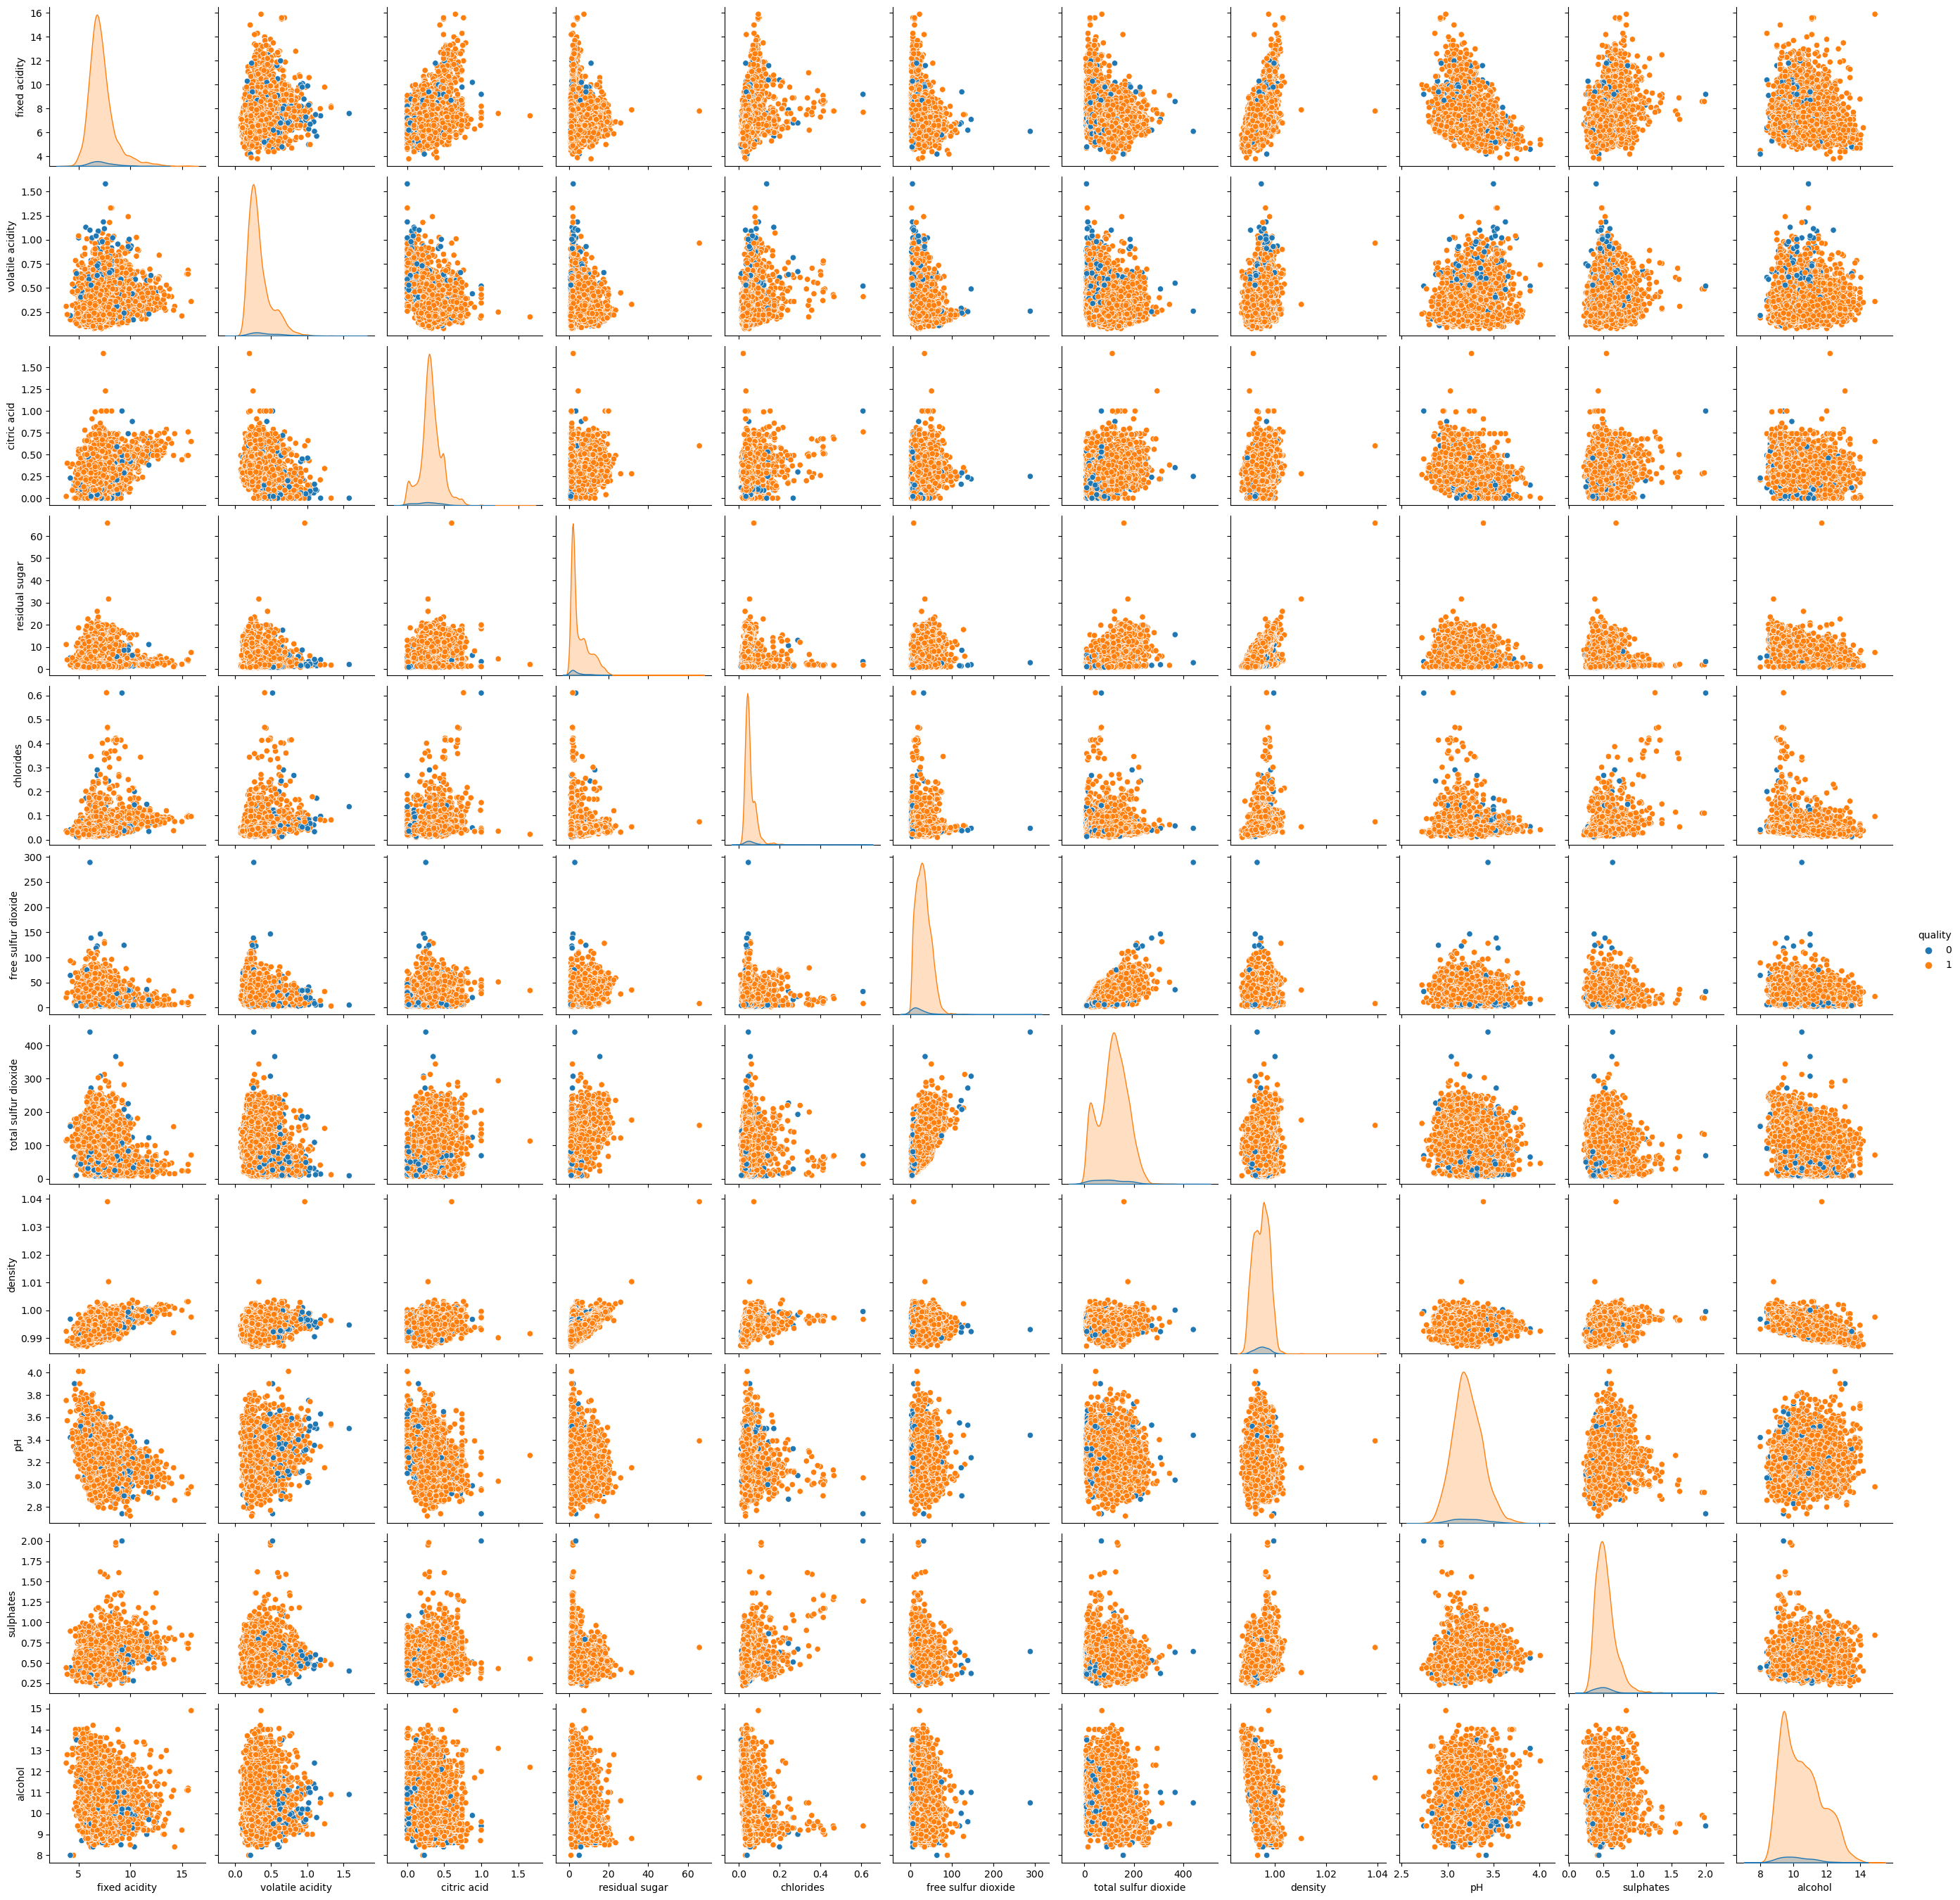

In [193]:
sns.pairplot(data=df_feature,hue="quality")

In [194]:
df_corr=pd.DataFrame(df_feature.corr()["quality"].sort_values()).transpose()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'volatile acidity'),
  Text(1, 0, 'chlorides'),
  Text(2, 0, 'fixed acidity'),
  Text(3, 0, 'pH'),
  Text(4, 0, 'density'),
  Text(5, 0, 'sulphates'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'residual sugar'),
  Text(8, 0, 'alcohol'),
  Text(9, 0, 'citric acid'),
  Text(10, 0, 'free sulfur dioxide')])

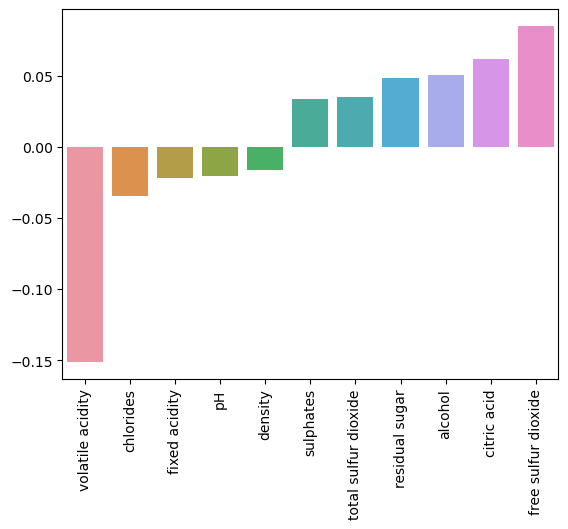

In [195]:
sns.barplot(data=df_corr.drop("quality",axis=1))
plt.xticks(rotation=90)

In [196]:
#we can see the biggest correlation of wine quality with volatile acidity

# Model

In [197]:
#We now need to prepaer data for model training

In [198]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [199]:
#doing on-hot encoding for string feature
df["type"]=pd.get_dummies(df["type"],drop_first=True)

In [200]:
X=df.drop("quality",axis=1)
y=df["quality"]

In [238]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
#we'll use pipline to scale data and use SVM model for classification 

In [258]:
scaler=StandardScaler()
svc=SVC(class_weight="balanced") #weighting can be useful since we have unbalanced classes

In [259]:
operations=[("scaler",scaler),("svc",svc)]
pipe=Pipeline(operations)

In [260]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [261]:
C_values=[0.001,0.01,0.1,1,10,100,1000]
#We should use specific string for grid search parameter names
#we will try different values for regularization parameter C, kernel coefficient gamma and kernel. 
param_grid = {"svc__C":C_values,"svc__gamma":["scale","auto"],"svc__gamma":["scale","auto"],"svc__kernel":["poly","rbf"]}

In [262]:
#Do grid search
svc_cv = GridSearchCV(pipe,param_grid,scoring="accuracy")
svc_cv.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['poly', 'rbf']},
             scoring='accuracy')

In [263]:
svc_cv.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=0.001, class_weight='balanced', kernel='poly'))])>

In [264]:
y_pred=svc_cv.predict(X_test)

In [265]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

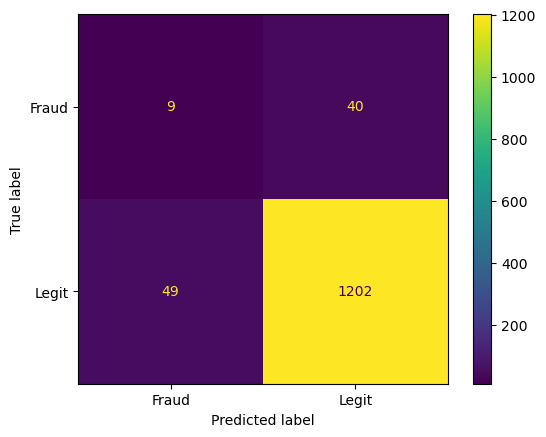

In [266]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [267]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.18      0.17        49
       Legit       0.97      0.96      0.96      1251

    accuracy                           0.93      1300
   macro avg       0.56      0.57      0.57      1300
weighted avg       0.94      0.93      0.93      1300



In [268]:
# The model performs poor because the provided features are not enough to be able to properly distinguish between good and poor quality wines